<a href="https://colab.research.google.com/github/swaroop116/machine-learning-learn/blob/main/credit_risk_analysis_and_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saiswarooprachakonda
Your Kaggle Key: ··········


100%|██████████| 11.2k/11.2k [00:00<00:00, 3.77MB/s]

In [12]:
df = pd.read_csv("/content/german-credit-data-with-risk/german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [14]:
cols =['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in cols:
  print(df[col].unique())


['male' 'female']
['own' 'free' 'rent']
[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [15]:
# label encode account quality and fill NaN with 0
def SC_LabelEncoder(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

df["Saving accounts"] = df["Saving accounts"].apply(SC_LabelEncoder)
df["Checking account"] = df["Checking account"].apply(SC_LabelEncoder)

In [16]:
# label encode account quality and fill NaN with 0
def H_LabelEncoder(text):
    if text == "free":
        return 0
    elif text == "rent":
        return 1
    elif text == "own":
        return 2

df["Housing"] = df["Housing"].apply(H_LabelEncoder)

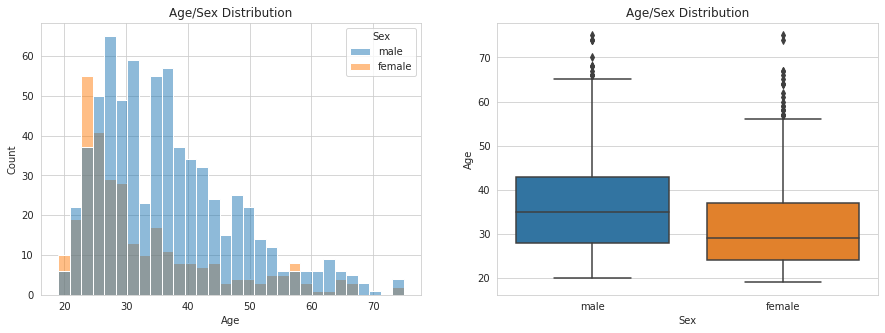

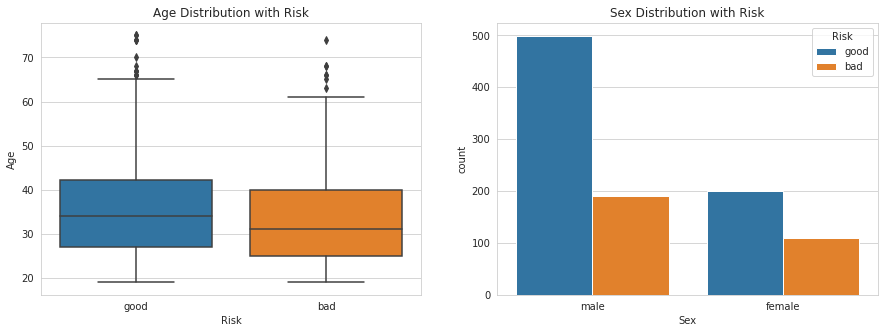

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Sex Distribution with Risk");

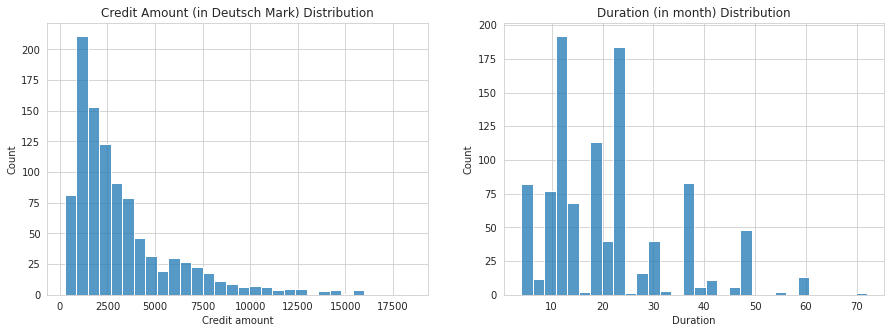

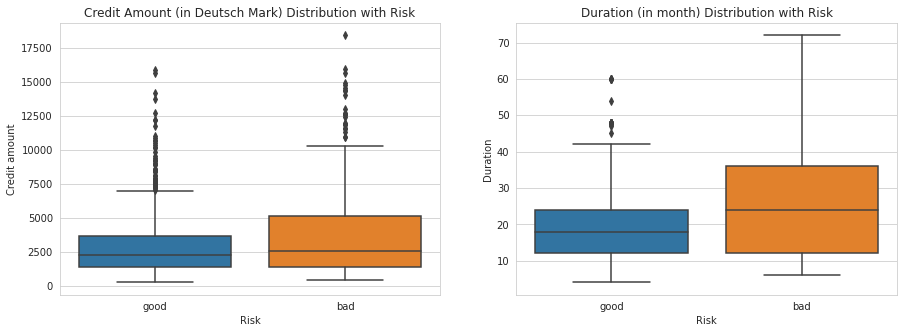

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Credit amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(df, x='Duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Credit amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=df, x='Risk', y='Duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

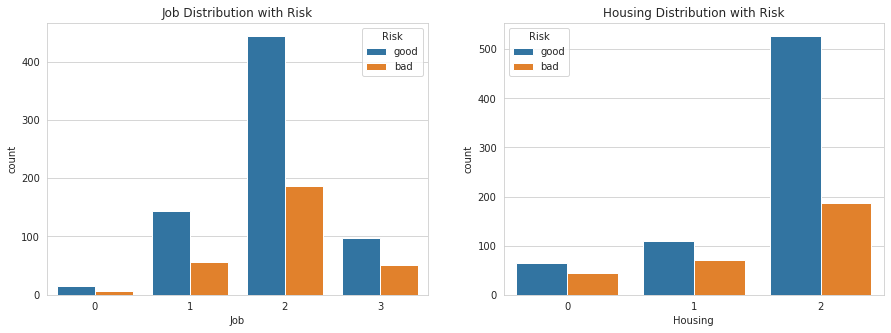

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Job", hue="Risk", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=df, x="Housing", hue="Risk", ax=ax[1]).set_title("Housing Distribution with Risk");

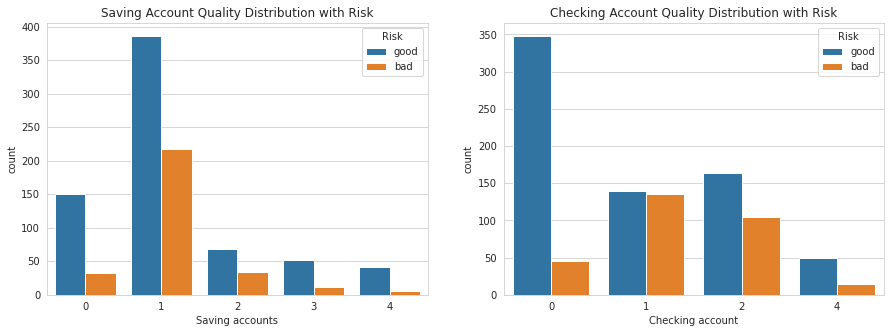

In [19]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=df, x="Saving accounts", hue="Risk", ax=ax[0]).set_title("Saving Account Quality Distribution with Risk");
sns.countplot(data=df, x="Checking account", hue="Risk", ax=ax[1]).set_title("Checking Account Quality Distribution with Risk");

In [20]:
for col in ["Sex", "Purpose", "Risk"]:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,0,1,1169,6,5,1
1,22,0,2,2,1,2,5951,48,5,0
2,49,1,1,2,1,0,2096,12,3,1
3,45,1,2,0,1,1,7882,42,4,1
4,53,1,2,0,1,1,4870,24,1,0


In [21]:
cdf = df.drop("Risk", axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

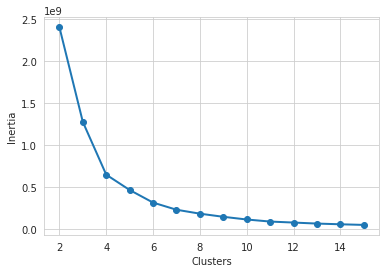

In [26]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(cdf)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

In [35]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(cdf)
clusters.size

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1000

<ipython-input-36-c4dcb963e120>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


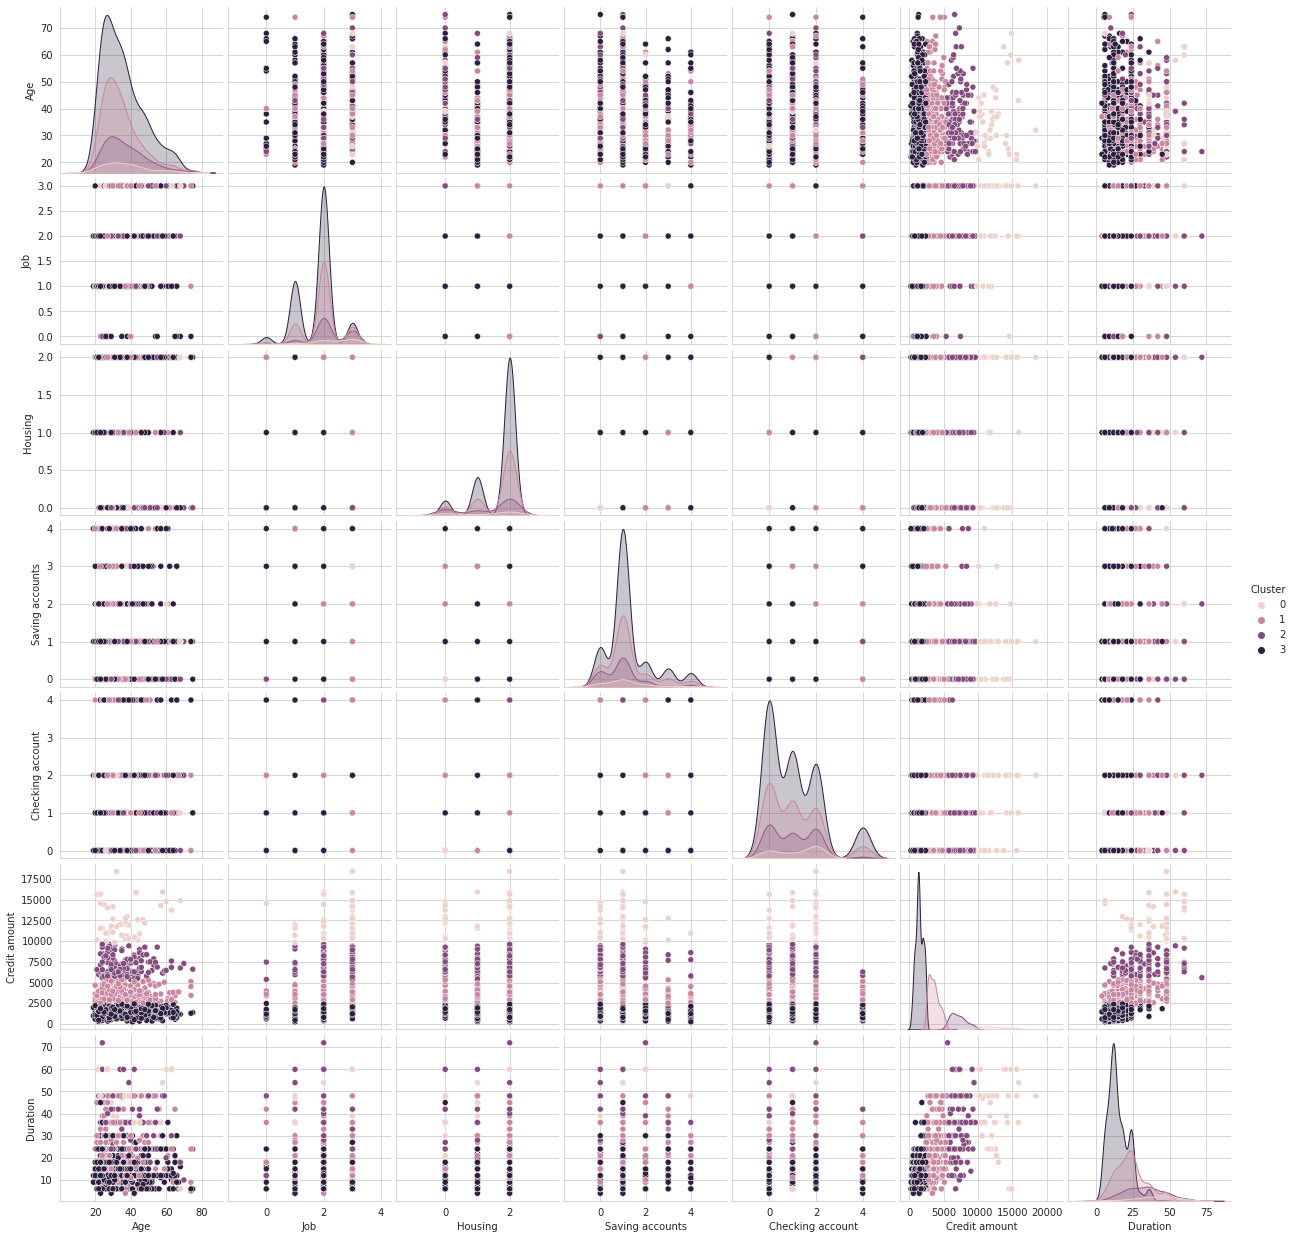

In [36]:
df_clustered = cdf[['Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['Age', 'Job', 'Housing', 'Saving accounts', 
                 'Checking account', 'Credit amount', 'Duration', "Cluster"]], hue="Cluster");

In [37]:
km = KMeans(n_clusters=2, random_state=0)
clusters = km.fit_predict(cdf)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
acc = max((sum(clusters == df["Risk"]) / len(df)), (sum(clusters != df["Risk"]) / len(df)))
display(Markdown("The accuracy rate of 2-Means clustering is " + str(acc)))

The accuracy rate of 2-Means clustering is 0.671

In [40]:
X, y = df.drop("Risk", axis=1), df["Risk"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [42]:
Models = {
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianNaiveBayes": GaussianNB()
}

In [45]:
cv_results = pd.DataFrame(columns=['model', 'train_score', 'test_score'])
for key in Models.keys():
    cv_res = model_selection.cross_validate(Models[key], X_train, y_train, 
                                             return_train_score=True,
                                             scoring="f1",
                                             cv=5, n_jobs=-1)
    res = {
        'model': key, 
        'train_score': cv_res["train_score"].mean(), 
        'test_score': cv_res["test_score"].mean(),
        'fit_time': cv_res["fit_time"].mean(),
        'score_time': cv_res["score_time"].mean(),
        }
    cv_results = cv_results.append(res, ignore_index=True)
    print("CV for model:", key, "done.")
cv_results

CV for model: SVC done.
CV for model: DecisionTree done.
CV for model: RandomForest done.
CV for model: GaussianNaiveBayes done.


,model,train_score,test_score,fit_time,score_time
0,SVC,0.826045,0.826072,0.064920,0.015064
1,DecisionTree,1.000000,0.754879,0.010852,0.004491
2,RandomForest,1.000000,0.822683,0.500181,0.041723
3,GaussianNaiveBayes,0.812051,0.811265,0.007942,0.009351


In [54]:
rf = Models["RandomForest"].fit(X_train, y_train)
print('f1_score:', f1_score(y_test, rf.predict(X_test)))

f1_score: 0.8424657534246575


In [55]:
feature_importance = pd.DataFrame()
feature_importance["feature"] = X_train.columns
feature_importance["importance"] = rf.feature_importances_
feature_importance = feature_importance.sort_values("importance", ascending=False)
feature_importance

,feature,importance
6,Credit amount,0.254427
0,Age,0.173246
7,Duration,0.161390
5,Checking account,0.132877
8,Purpose,0.086665
4,Saving accounts,0.068749
2,Job,0.053481
3,Housing,0.038797
1,Sex,0.030368
